In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import pprint

In [2]:
df = pd.read_csv('Agri_all.csv')

In [3]:
df['YM'] = df['YM'].astype('str')

In [4]:
df

,YMD,YM,MD,Product,Price,KRW_USD_EXR,Annual_Call_Rate,item_PPI,item_CPI,Food_Price_Index,Cereals_Price_Index,DayAvg_Temperature,DayDiff_Temperature,DayAvg_RelativeHumidity,DaySum_Rainfall,DayAvg_WindSpeed,DaySum_Sunshine,Warning_Count
0,2005-01-03,200501,103,마늘,20785.714286,1013.00,3.33,49.58,58.27,65.4,60.5,4.400000,12.800000,35.200000,0.000000,2.600000,1.600000,0.000000
1,2005-01-04,200501,104,마늘,20785.714286,1013.00,3.33,49.58,58.27,65.4,60.5,-0.200000,8.800000,26.000000,0.000000,2.800000,2.800000,0.000000
2,2005-01-05,200501,105,마늘,20928.571429,1013.00,3.33,49.58,58.27,65.4,60.5,-1.400000,11.200000,33.400000,0.000000,0.600000,3.200000,0.000000
3,2005-01-06,200501,106,마늘,21071.428571,1013.00,3.33,49.58,58.27,65.4,60.5,2.800000,7.800000,31.200000,1.200000,1.200000,2.600000,0.000000
4,2005-01-07,200501,107,마늘,21071.428571,1013.00,3.33,49.58,58.27,65.4,60.5,2.000000,7.600000,28.400000,0.000000,2.800000,2.800000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15875,2020-12-24,202012,1224,고구마,10258.695652,1180.05,0.70,137.90,96.13,108.6,116.4,3.529412,8.588235,59.117647,0.000000,1.705882,3.529412,0.000000
15876,2020-12-28,202012,1228,고구마,10431.323529,1180.05,0.70,137.90,96.13,108.6,116.4,3.941176,11.941176,80.352941,0.058824,0.411765,3.117647,0.000000
15877,2020-12-29,202012,1229,고구마,10431.323529,1180.05,0.70,137.90,96.13,108.6,116.4,1.590909,9.227273,77.227273,1.272727,1.863636,0.636364,0.772727
15878,2020-12-30,202012,1230,고구마,10460.735294,1180.05,0.70,137.90,96.13,108.6,116.4,-5.500000,6.250000,65.375000,0.291667,3.958333,2.666667,0.833333


In [5]:
df.isnull().sum()

YMD                           0
YM                            0
MD                            0
Product                       0
Price                         0
KRW_USD_EXR                   0
Annual_Call_Rate              0
item_PPI                   3970
item_CPI                      0
Food_Price_Index              0
Cereals_Price_Index           0
DayAvg_Temperature            0
DayDiff_Temperature           0
DayAvg_RelativeHumidity       0
DaySum_Rainfall               0
DayAvg_WindSpeed              0
DaySum_Sunshine               0
Warning_Count                 0
dtype: int64

In [6]:
df[df['item_PPI'].isnull()]['Product'].unique()

array(['깻잎'], dtype=object)

# 마늘

In [7]:
garlic = df.loc[df['Product']=='마늘']
garlic = pd.DataFrame(garlic.groupby('YM').mean())
garlic_exog = garlic.iloc[:, 2:8]
garlic = pd.DataFrame(garlic.iloc[:, 1])
garlic

,Price
YM,
200501,21037.414966
200502,21388.655462
200503,21808.441558
200504,21423.469388
200505,17682.463843
...,...
202008,41740.128788
202009,52040.692641
202010,53665.151515


In [8]:
garlic[168:]

,Price
YM,
201901,66831.818182
201902,66301.960784
201903,65177.777778
201904,65400.000000
201905,65400.000000
201906,44586.315789
201907,34856.521739
201908,30538.095238
201909,39362.573099


In [9]:
# train_idx = round(len(garlic)*0.8)
train_idx = 168
test_idx = len(garlic)-train_idx
train_idx, test_idx

(168, 24)

<AxesSubplot: xlabel='YM'>

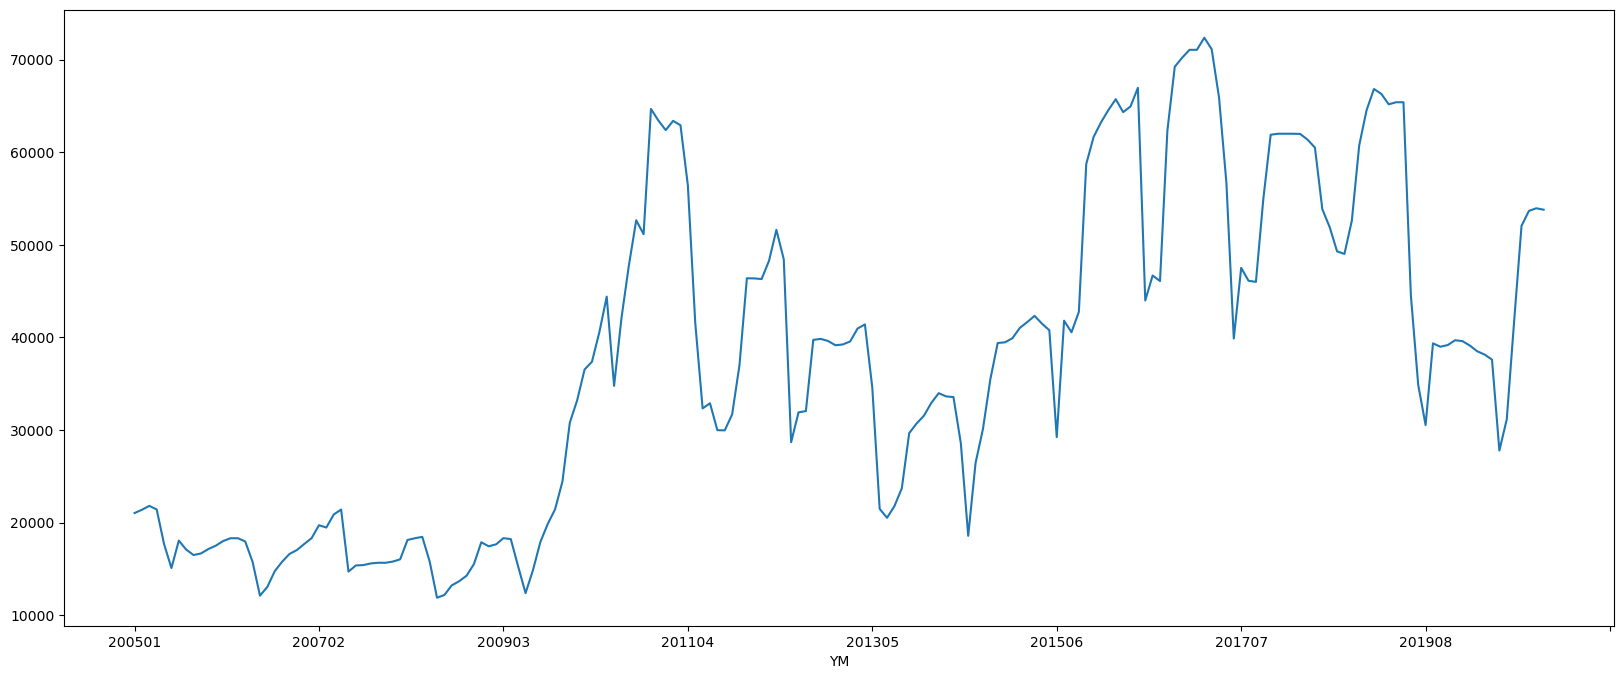

In [10]:
garlic['Price'].plot(figsize=(20,8))

In [11]:
garlic_train = garlic.iloc[:train_idx]
garlic_test = garlic.iloc[train_idx:]

# ACF PACF (p, d, q값 결정)

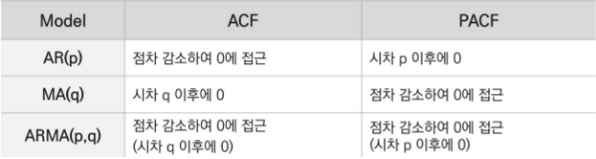

C:\Users\Maplexz\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


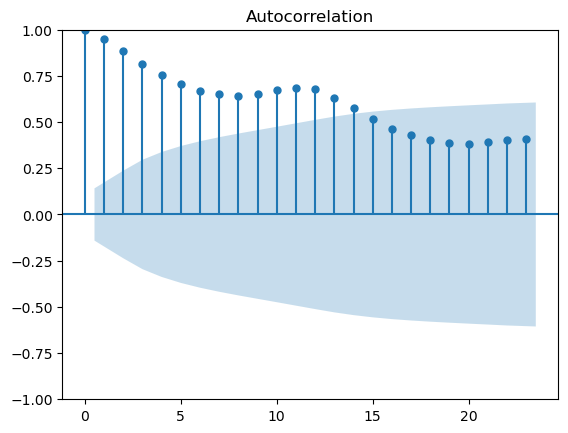

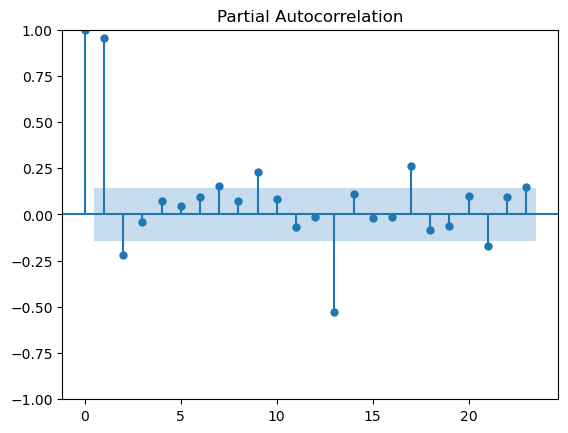

In [12]:
plot_acf(garlic)
plot_pacf(garlic)
plt.show()

C:\Users\Maplexz\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


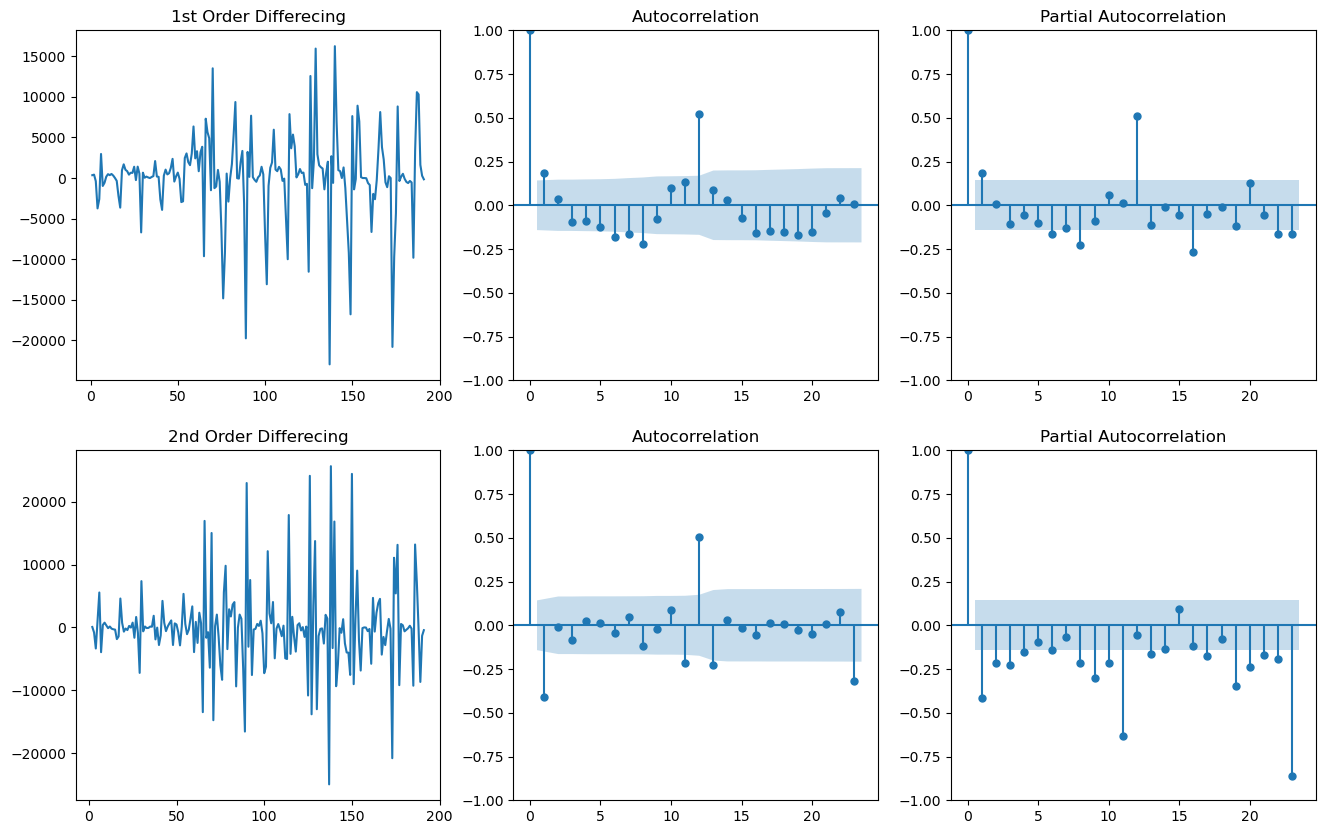

p-value:  0.19501092917569562
1st Order Diff p-value:  0.002307082728922412
2nd Order Diff p-value:  4.1713933063340503e-26


In [13]:
garlic = garlic.reset_index()

f = plt.figure(figsize=(16,10))
ax1 = f.add_subplot(231)
ax1.set_title('1st Order Differecing')
ax1.plot(garlic.Price.diff())

ax2 = f.add_subplot(232)
plot_acf(garlic.Price.diff().dropna(), ax=ax2)

ax3 = f.add_subplot(233)
plot_pacf(garlic.Price.diff().dropna(), ax=ax3)

ax4 = f.add_subplot(234)
ax4.set_title('2nd Order Differecing')
ax4.plot(garlic.Price.diff().diff())

ax5 = f.add_subplot(235)
plot_acf(garlic.Price.diff().diff().dropna(), ax=ax5)

ax6 = f.add_subplot(236)
plot_pacf(garlic.Price.diff().diff().dropna(), ax=ax6)

plt.show()

garlic.index=garlic['YM']
garlic = garlic.drop('YM', axis=1)

result = adfuller(garlic.Price.dropna())
print('p-value: ', result[1])

result = adfuller(garlic.Price.diff().dropna())
print('1st Order Diff p-value: ', result[1])

result = adfuller(garlic.Price.diff().diff().dropna())
print('2nd Order Diff p-value: ', result[1])

In [14]:
model=ARIMA(garlic['Price'], order=(2,1,3))
history=model.fit()

C:\Users\Maplexz\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Maplexz\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Maplexz\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Maplexz\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Maplexz\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting M

In [15]:
history.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                  192
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -1887.759
Date:                Tue, 03 Jan 2023   AIC                           3787.519
Time:                        15:09:27   BIC                           3807.032
Sample:                             0   HQIC                          3795.422
                                - 192                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7216      0.015    111.319      0.000       1.691       1.752
ar.L2         -0.9962      0.012    -82.043      0.000      -1.020      -0.972
ma.L1         -1.7280      0.078    -22.220      0.000      -1.880      -1.576
ma.L2          1.0369      0.115      8.998      0.000       0.811       1.263
ma.L3         -0.0273      0.077     -0.353      0.724      -0.179       0.124
sigma2      2.524e+07      5e-09   5.05e+15      0.000    2.52e+07    2.52e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               149.98
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               8.57   Skew:                            -0.64
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.96e+30. Standard errors may be unstable.
"""

<AxesSubplot: xlabel='YM'>

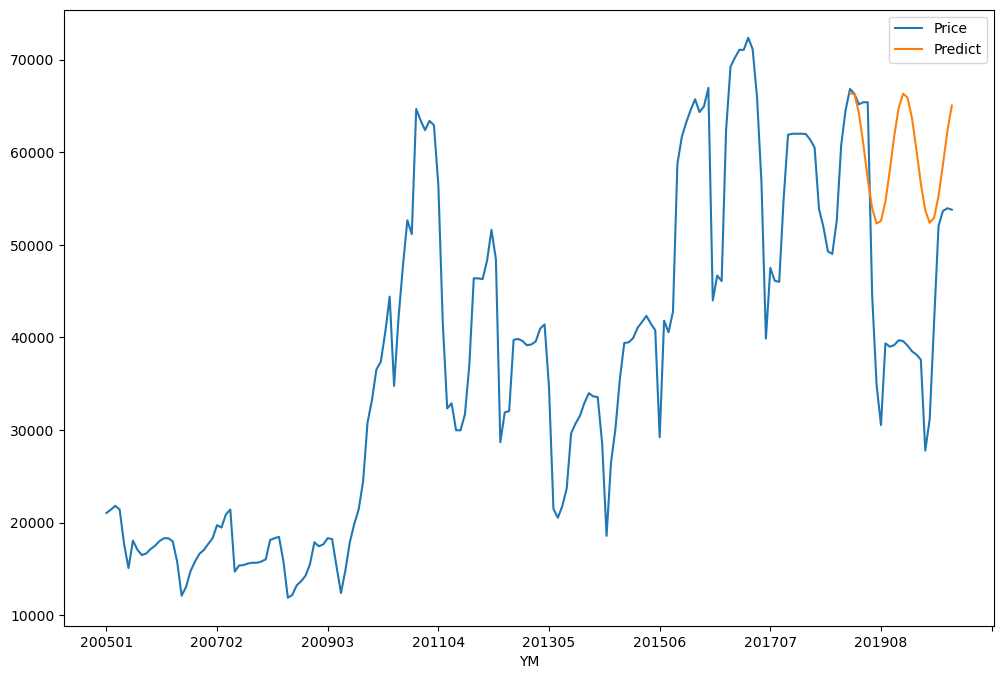

In [16]:
garlic['Predict']=history.predict(start=train_idx, end=train_idx+test_idx-1, dynamic=True)
garlic[['Price','Predict']].plot(figsize=(12,8))

In [17]:
y_true = garlic[~garlic['Predict'].isna()]['Price']
y_pred = garlic[~garlic['Predict'].isna()]['Predict']

mape = np.mean(np.abs(y_pred - y_true) / np.abs(y_true))
mae = np.mean(np.abs(y_pred - y_true))
mpe = np.mean((y_pred-y_true)/y_true)
rmse = np.mean((y_pred - y_true)**2)**.5


pprint.pprint({'mape':mape, 'mae':mae,
       'mpe':mpe, 'rmse':rmse})

{'mae': 14634.975019172847,
 'mape': 0.38499655053175347,
 'mpe': 0.36690113834857846,
 'rmse': 17207.074257335764}


# SARIMAX

In [18]:
model=sm.tsa.statespace.SARIMAX(garlic['Price'], exog=garlic_exog, order=(2, 1, 3), seasonal_order=(2,1,3,12))
results=model.fit()

C:\Users\Maplexz\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Maplexz\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Maplexz\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot: xlabel='YM'>

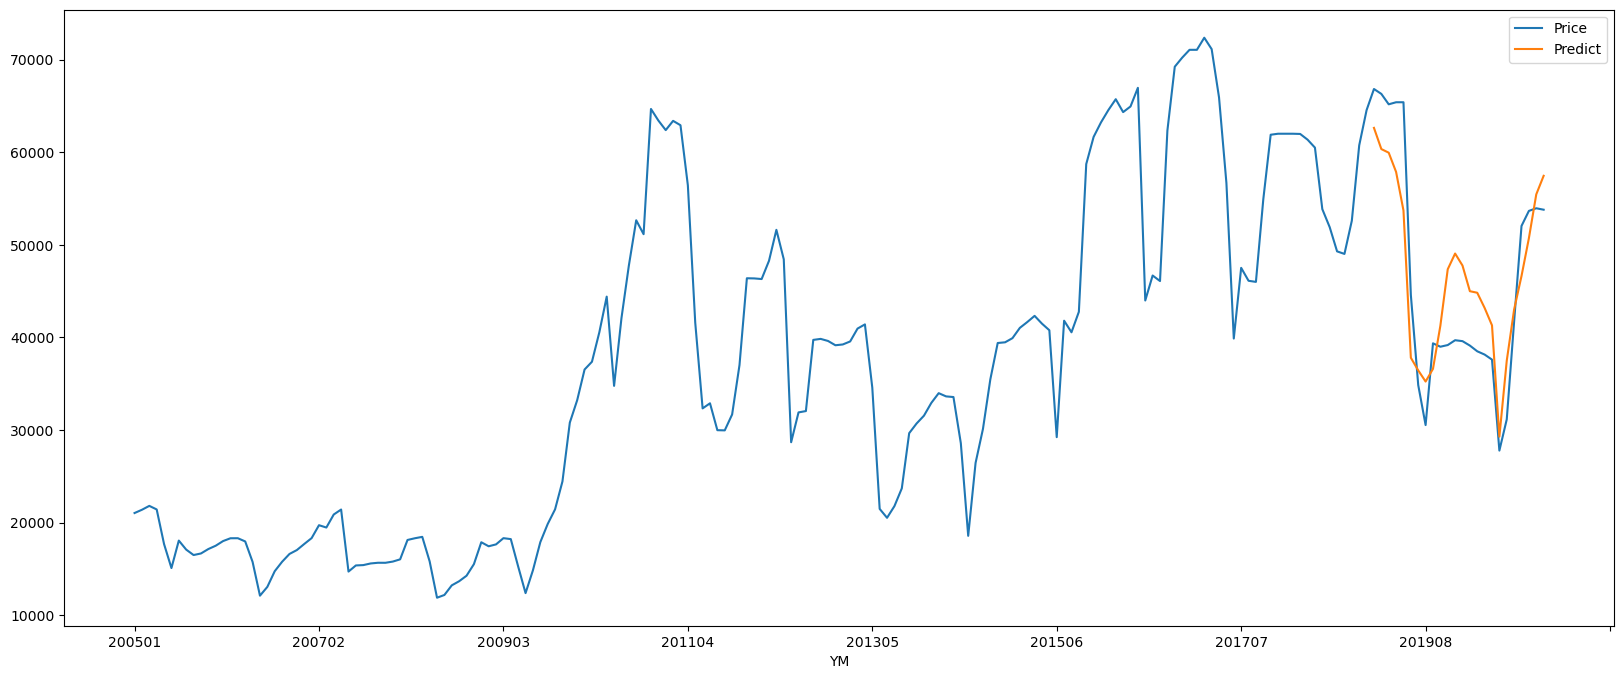

In [19]:
garlic['Predict']=results.predict(start=train_idx, end=train_idx+test_idx-1, dynamic=True)
garlic[['Price','Predict']].plot(figsize=(20,8))

In [20]:
y_true = garlic[~garlic['Predict'].isna()]['Price']
y_pred = garlic[~garlic['Predict'].isna()]['Predict']

mape = np.mean(np.abs(y_pred - y_true) / np.abs(y_true))
mae = np.mean(np.abs(y_pred - y_true))
mpe = np.mean((y_pred-y_true)/y_true)
rmse = np.mean((y_pred - y_true)**2)**.5


pprint.pprint({'mape':mape, 'mae':mae,
       'mpe':mpe, 'rmse':rmse})

{'mae': 5082.4139570994475,
 'mape': 0.11437849357805545,
 'mpe': 0.03874320866615325,
 'rmse': 5735.694463135484}


# 감자

In [21]:
potato = df.loc[df['Product']=='감자']
potato = pd.DataFrame(potato.groupby('YM').mean())
potato_exog = potato.iloc[:, 2:8]
potato = pd.DataFrame(potato.iloc[:, 1])
potato

,Price
YM,
200501,6467.292621
200502,7436.426577
200503,7081.545223
200504,6834.099024
200505,6803.346901
...,...
202008,4383.076468
202009,4790.924308
202010,4650.754234


<AxesSubplot: xlabel='YM'>

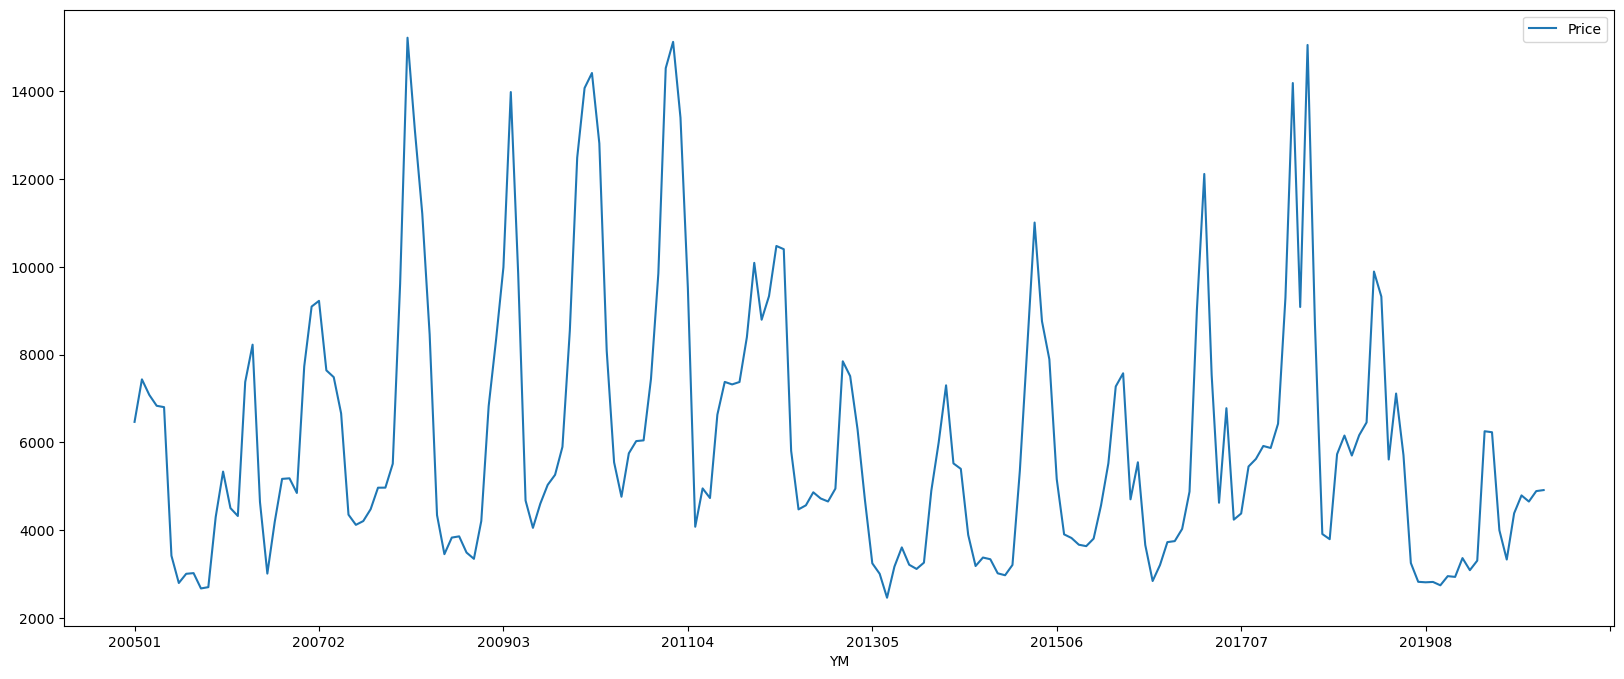

In [22]:
potato.plot(figsize=(20,8))

In [23]:
potato_train = potato.iloc[:train_idx]
potato_test = potato.iloc[train_idx:]

C:\Users\Maplexz\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


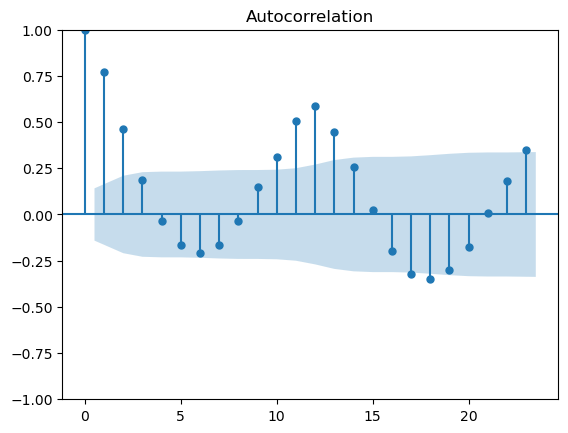

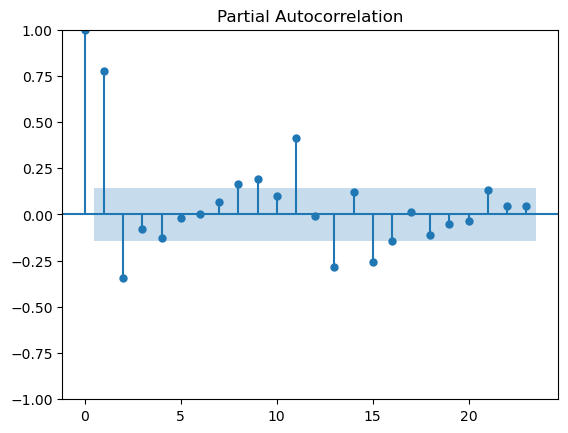

In [24]:
plot_acf(potato)
plot_pacf(potato)
plt.show()

C:\Users\Maplexz\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


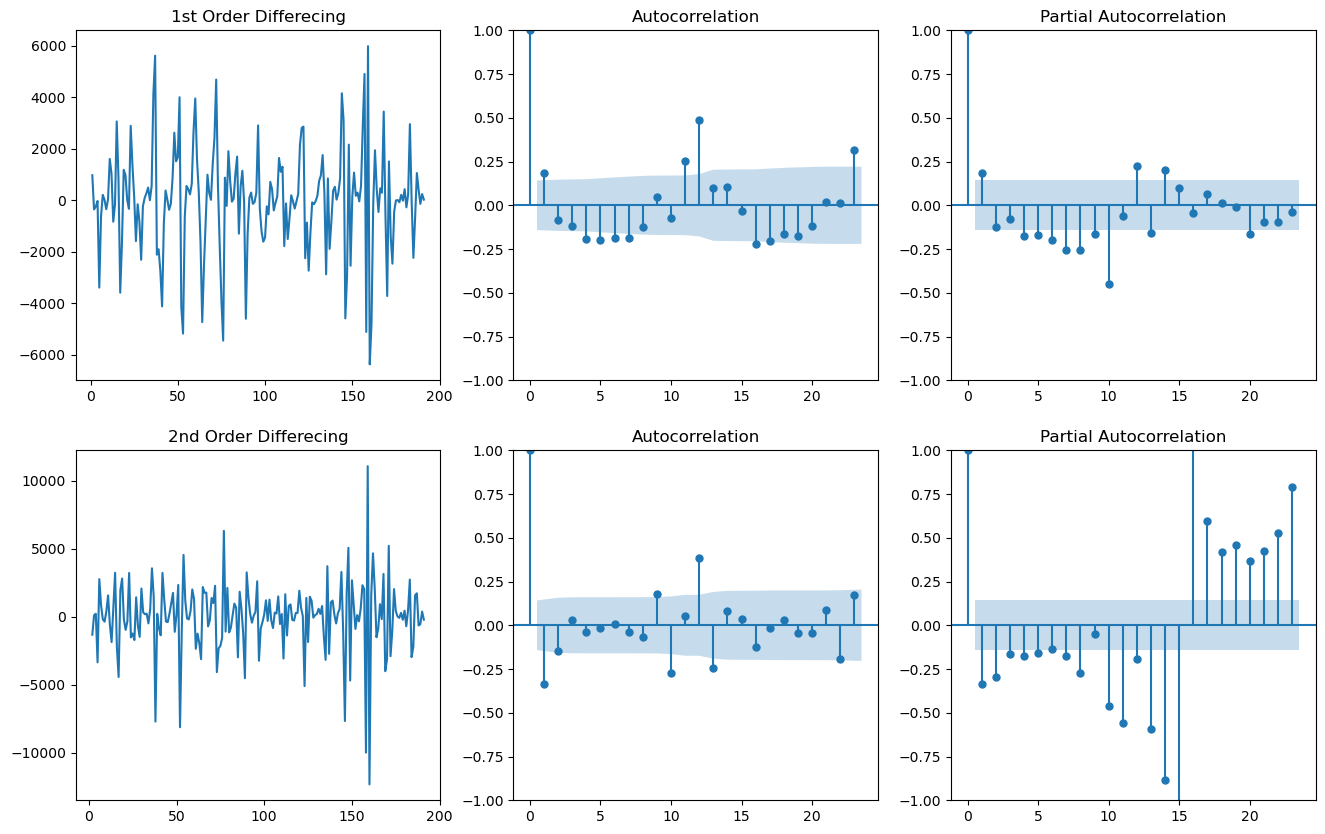

p-value:  0.10695334079975943
1st Order Diff p-value:  0.00014761913815669023
2nd Order Diff p-value:  1.977981627791984e-17


In [25]:
potato = potato.reset_index()

f = plt.figure(figsize=(16,10))
ax1 = f.add_subplot(231)
ax1.set_title('1st Order Differecing')
ax1.plot(potato.Price.diff())

ax2 = f.add_subplot(232)
plot_acf(potato.Price.diff().dropna(), ax=ax2)

ax3 = f.add_subplot(233)
plot_pacf(potato.Price.diff().dropna(), ax=ax3)

ax4 = f.add_subplot(234)
ax4.set_title('2nd Order Differecing')
ax4.plot(potato.Price.diff().diff())

ax5 = f.add_subplot(235)
plot_acf(potato.Price.diff().diff().dropna(), ax=ax5)

ax6 = f.add_subplot(236)
plot_pacf(potato.Price.diff().diff().dropna(), ax=ax6)

plt.show()

potato.index=potato['YM']
potato = potato.drop('YM', axis=1)

result = adfuller(potato.Price.dropna())
print('p-value: ', result[1])

result = adfuller(potato.Price.diff().dropna())
print('1st Order Diff p-value: ', result[1])

result = adfuller(potato.Price.diff().diff().dropna())
print('2nd Order Diff p-value: ', result[1])

In [26]:
model=ARIMA(potato['Price'], order=(2,1,2))
history=model.fit()

C:\Users\Maplexz\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Maplexz\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Maplexz\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Maplexz\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Maplexz\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting M

In [27]:
history.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                  192
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1690.648
Date:                Tue, 03 Jan 2023   AIC                           3391.297
Time:                        15:09:41   BIC                           3407.558
Sample:                             0   HQIC                          3397.883
                                - 192                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6315      0.047     34.686      0.000       1.539       1.724
ar.L2         -0.8712      0.043    -20.320      0.000      -0.955      -0.787
ma.L1         -1.7422      0.062    -28.048      0.000      -1.864      -1.620
ma.L2          0.8330      0.066     12.565      0.000       0.703       0.963
sigma2      2.833e+06   2.16e+05     13.098      0.000    2.41e+06    3.26e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                54.81
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               1.47   Skew:                             0.74
Prob(H) (two-sided):                  0.13   Kurtosis:                         5.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot: xlabel='YM'>

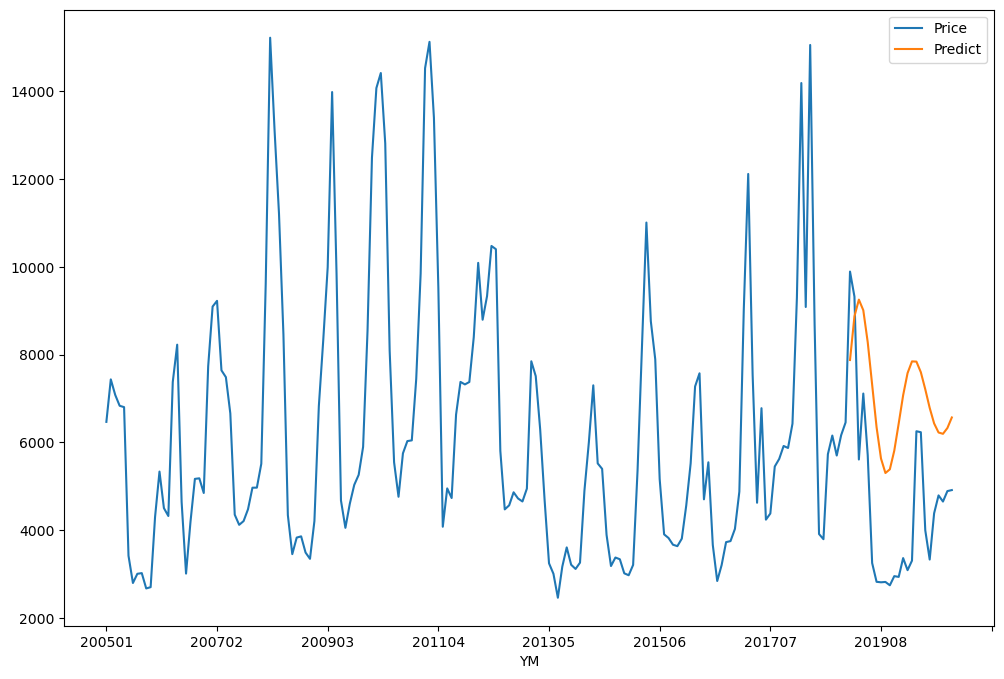

In [28]:
potato['Predict']=history.predict(start=train_idx, end=train_idx+test_idx-1, dynamic=True)
potato[['Price','Predict']].plot(figsize=(12,8))

In [29]:
y_true = potato[~potato['Predict'].isna()]['Price']
y_pred = potato[~potato['Predict'].isna()]['Predict']

mape = np.mean(np.abs(y_pred - y_true) / np.abs(y_true))
mae = np.mean(np.abs(y_pred - y_true))
mpe = np.mean((y_pred-y_true)/y_true)
rmse = np.mean((y_pred - y_true)**2)**.5


pprint.pprint({'mape':mape, 'mae':mae,
       'mpe':mpe, 'rmse':rmse})

{'mae': 2623.7523928041246,
 'mape': 0.7129734073451656,
 'mpe': 0.6919581372250033,
 'rmse': 2835.2842631918006}


# SARIMAX

In [30]:
model=sm.tsa.statespace.SARIMAX(potato['Price'], exog=potato_exog, order=(2, 1, 2), seasonal_order=(2,1,2,12))
results=model.fit()

C:\Users\Maplexz\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Maplexz\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Maplexz\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot: xlabel='YM'>

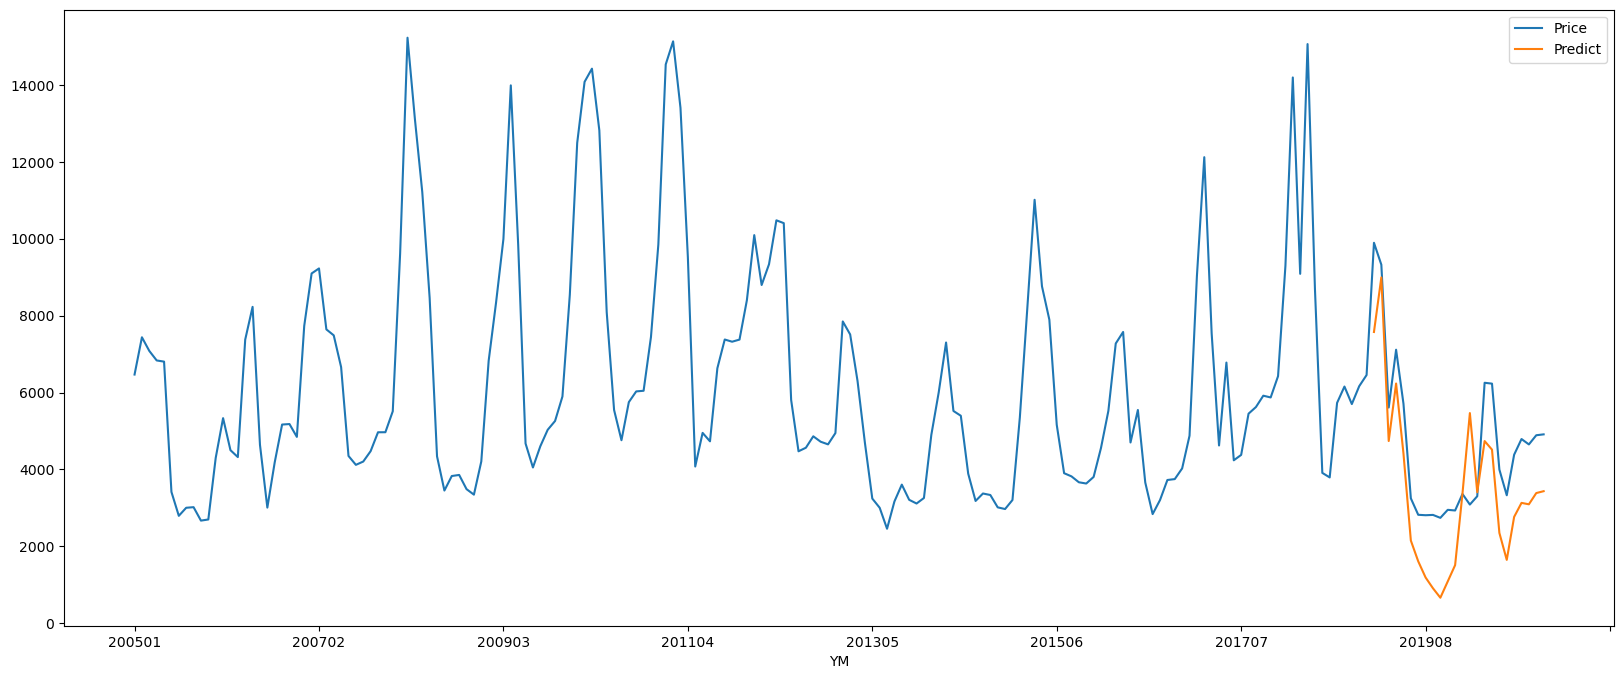

In [31]:
potato['Predict']=results.predict(start=train_idx, end=train_idx+test_idx-1, dynamic=True)
potato[['Price','Predict']].plot(figsize=(20,8))

In [32]:
y_true = potato[~potato['Predict'].isna()]['Price']
y_pred = potato[~potato['Predict'].isna()]['Predict']

mape = np.mean(np.abs(y_pred - y_true) / np.abs(y_true))
mae = np.mean(np.abs(y_pred - y_true))
mpe = np.mean((y_pred-y_true)/y_true)
rmse = np.mean((y_pred - y_true)**2)**.5


pprint.pprint({'mape':mape, 'mae':mae,
       'mpe':mpe, 'rmse':rmse})

{'mae': 1406.618261653862,
 'mape': 0.3569950134330779,
 'mpe': -0.28976680961408574,
 'rmse': 1528.9867299410046}


# 고구마

In [33]:
sweetpotato = df.loc[df['Product']=='고구마']
sweetpotato = pd.DataFrame(sweetpotato.groupby('YM').mean())
sweetpotato_exog = sweetpotato.iloc[:, 2:8]
sweetpotato = pd.DataFrame(sweetpotato.iloc[:, 1])
sweetpotato

,Price
YM,
200501,4536.756043
200502,4652.599179
200503,5012.198732
200504,5563.116631
200505,5939.400333
...,...
202008,14122.158248
202009,10522.090488
202010,9244.383846


<AxesSubplot: xlabel='YM'>

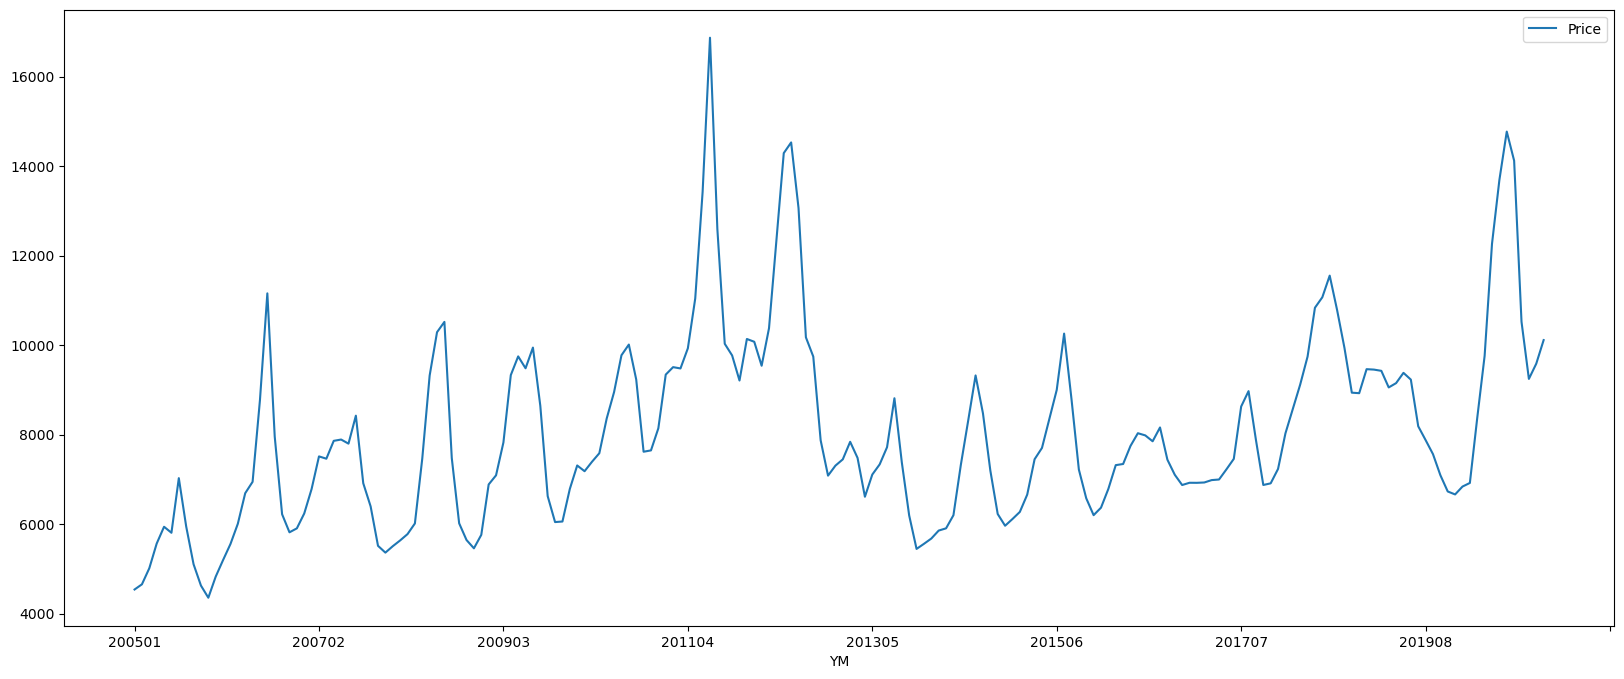

In [34]:
sweetpotato.plot(figsize=(20,8))

In [35]:
sweetpotato_train = sweetpotato.iloc[:train_idx]
sweetpotato_test = sweetpotato.iloc[train_idx:]

C:\Users\Maplexz\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


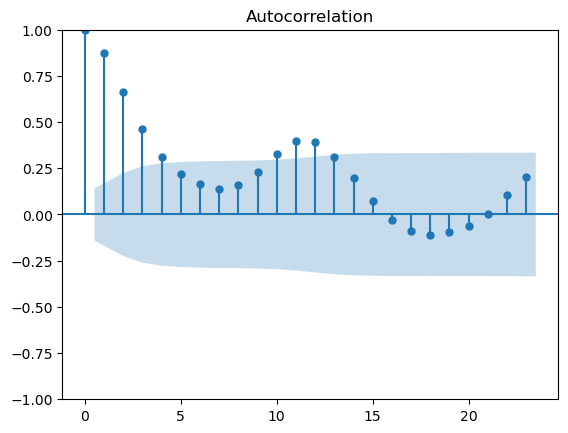

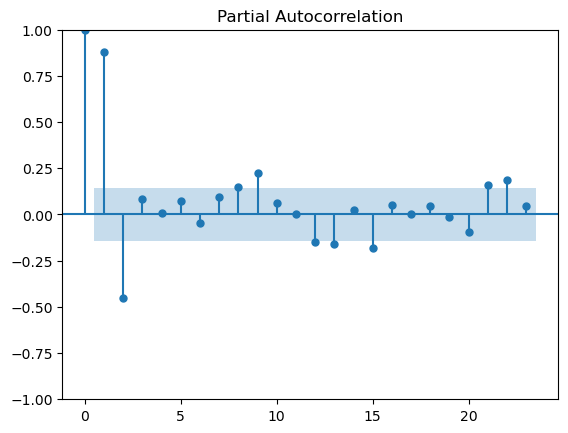

In [36]:
plot_acf(sweetpotato)
plot_pacf(sweetpotato)
plt.show()

C:\Users\Maplexz\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


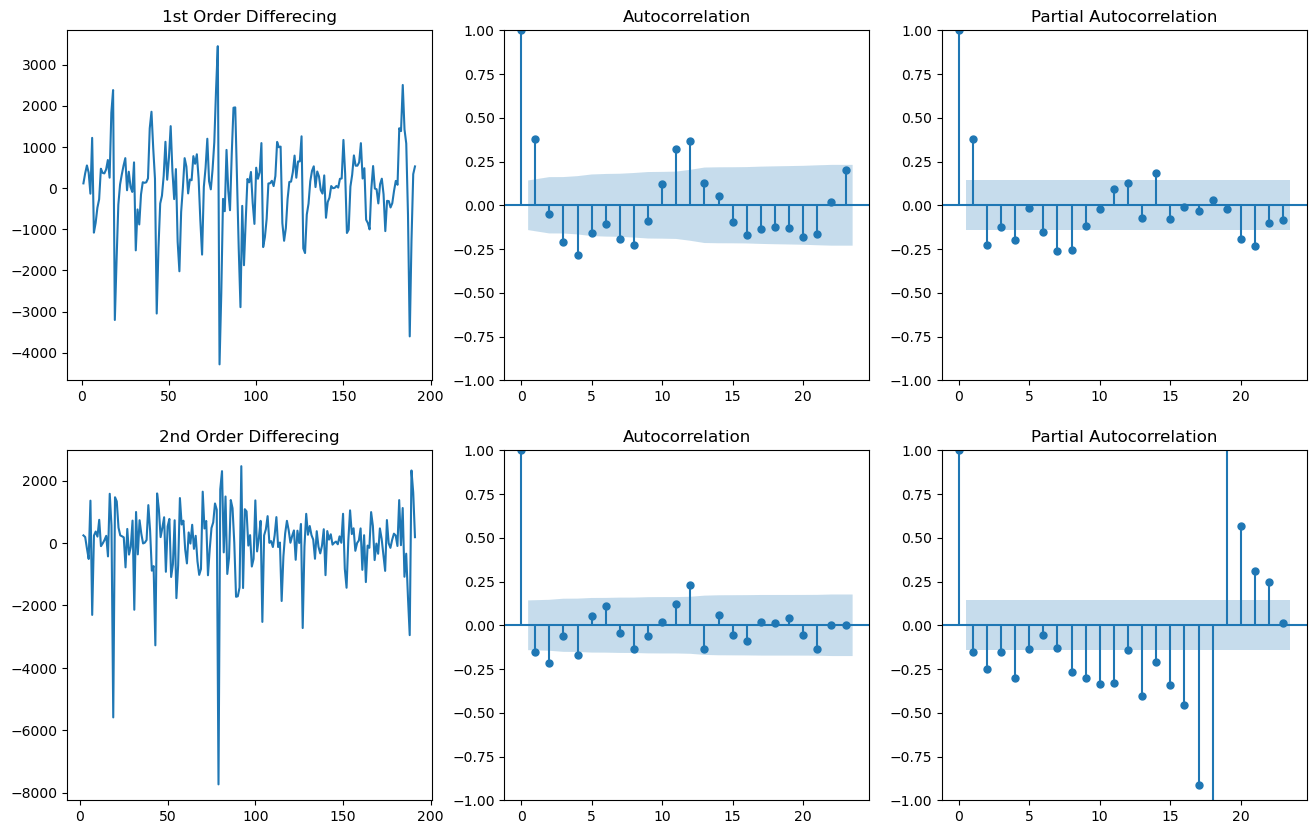

p-value:  0.08832727535177815
1st Order Diff p-value:  0.026315900042141415
2nd Order Diff p-value:  1.2782295227617808e-16


In [37]:
sweetpotato = sweetpotato.reset_index()

f = plt.figure(figsize=(16,10))
ax1 = f.add_subplot(231)
ax1.set_title('1st Order Differecing')
ax1.plot(sweetpotato.Price.diff())

ax2 = f.add_subplot(232)
plot_acf(sweetpotato.Price.diff().dropna(), ax=ax2)

ax3 = f.add_subplot(233)
plot_pacf(sweetpotato.Price.diff().dropna(), ax=ax3)

ax4 = f.add_subplot(234)
ax4.set_title('2nd Order Differecing')
ax4.plot(sweetpotato.Price.diff().diff())

ax5 = f.add_subplot(235)
plot_acf(sweetpotato.Price.diff().diff().dropna(), ax=ax5)

ax6 = f.add_subplot(236)
plot_pacf(sweetpotato.Price.diff().diff().dropna(), ax=ax6)

plt.show()

sweetpotato.index=sweetpotato['YM']
sweetpotato = sweetpotato.drop('YM', axis=1)

result = adfuller(sweetpotato.Price.dropna())
print('p-value: ', result[1])

result = adfuller(sweetpotato.Price.diff().dropna())
print('1st Order Diff p-value: ', result[1])

result = adfuller(sweetpotato.Price.diff().diff().dropna())
print('2nd Order Diff p-value: ', result[1])

In [38]:
model=ARIMA(sweetpotato['Price'], order=(2,1,2))
history=model.fit()

C:\Users\Maplexz\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Maplexz\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Maplexz\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [39]:
history.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                  192
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1567.086
Date:                Tue, 03 Jan 2023   AIC                           3144.171
Time:                        15:09:50   BIC                           3160.433
Sample:                             0   HQIC                          3150.758
                                - 192                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2063      0.135      8.917      0.000       0.941       1.471
ar.L2         -0.4997      0.143     -3.505      0.000      -0.779      -0.220
ma.L1         -0.8810      0.170     -5.192      0.000      -1.214      -0.548
ma.L2          0.0100      0.189      0.053      0.958      -0.359       0.379
sigma2      7.721e+05   5.17e+04     14.932      0.000    6.71e+05    8.73e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               226.54
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               0.54   Skew:                            -0.87
Prob(H) (two-sided):                  0.01   Kurtosis:                         8.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot: xlabel='YM'>

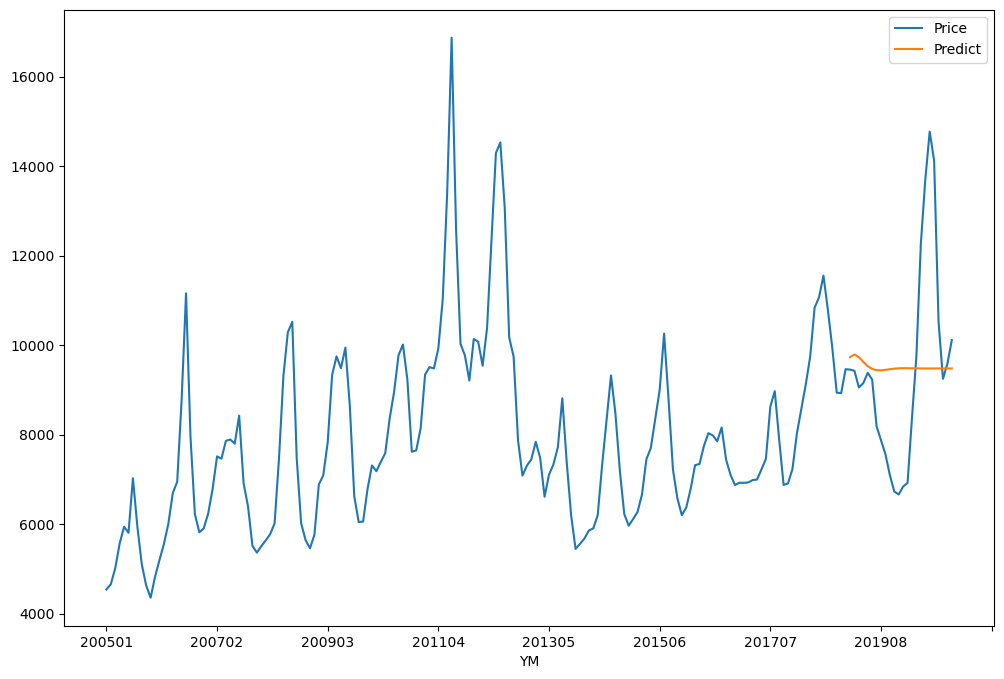

In [40]:
sweetpotato['Predict']=history.predict(start=train_idx, end=train_idx+test_idx-1, dynamic=True)
sweetpotato[['Price','Predict']].plot(figsize=(12,8))

In [41]:
y_true = sweetpotato[~sweetpotato['Predict'].isna()]['Price']
y_pred = sweetpotato[~sweetpotato['Predict'].isna()]['Predict']

mape = np.mean(np.abs(y_pred - y_true) / np.abs(y_true))
mae = np.mean(np.abs(y_pred - y_true))
mpe = np.mean((y_pred-y_true)/y_true)
rmse = np.mean((y_pred - y_true)**2)**.5


pprint.pprint({'mape':mape, 'mae':mae,
       'mpe':mpe, 'rmse':rmse})

{'mae': 1681.9628840841724,
 'mape': 0.18087984468303223,
 'mpe': 0.06222408145880547,
 'rmse': 2247.0970841859094}


# SARIMAX

In [42]:
model=sm.tsa.statespace.SARIMAX(sweetpotato['Price'], exog=sweetpotato_exog, order=(2, 1, 2), seasonal_order=(2,1,2,12))
results=model.fit()

C:\Users\Maplexz\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Maplexz\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Maplexz\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot: xlabel='YM'>

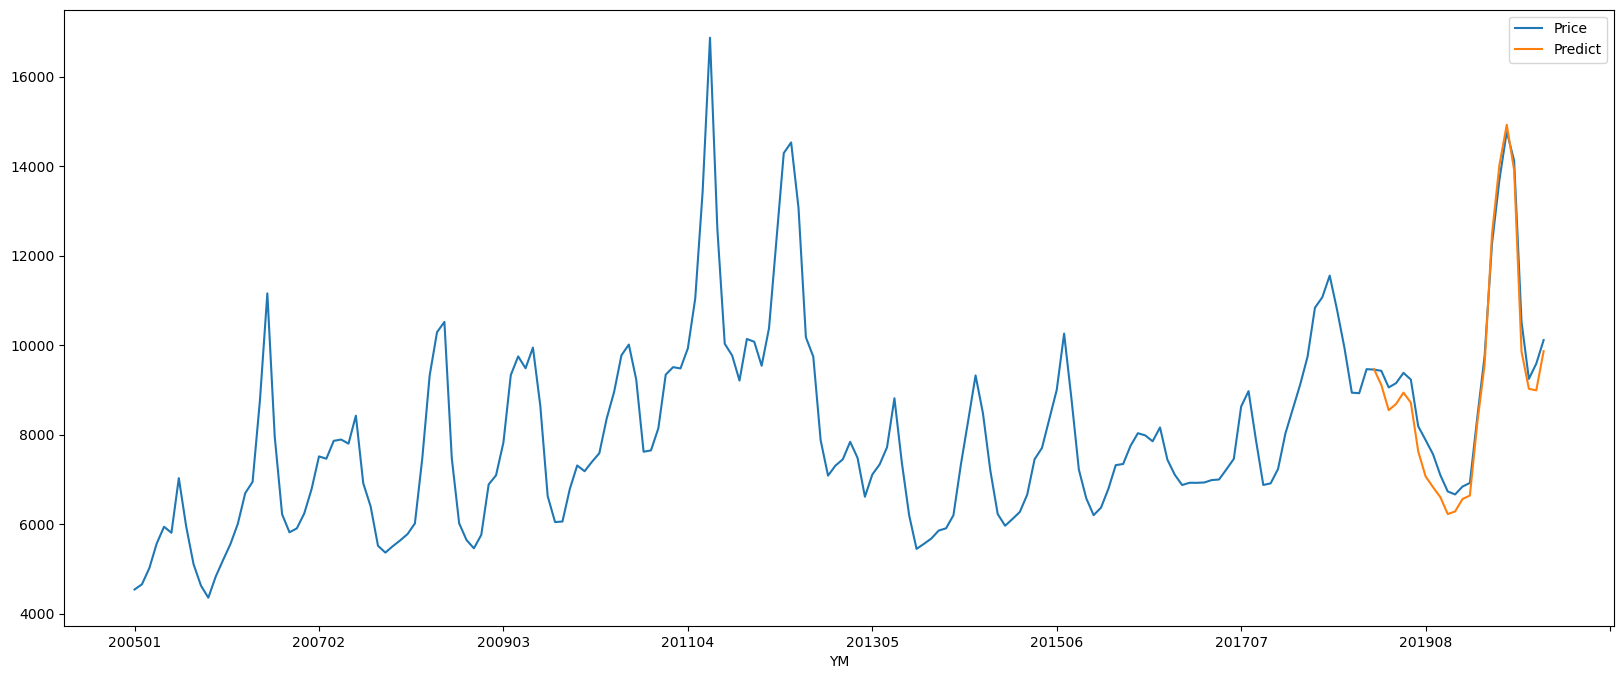

In [43]:
sweetpotato['Predict']=results.predict(start=train_idx,end=train_idx+test_idx-1,dynamic=True)
sweetpotato[['Price','Predict']].plot(figsize=(20,8))

In [44]:
y_true = sweetpotato[~sweetpotato['Predict'].isna()]['Price']
y_pred = sweetpotato[~sweetpotato['Predict'].isna()]['Predict']

mape = np.mean(np.abs(y_pred - y_true) / np.abs(y_true))
mae = np.mean(np.abs(y_pred - y_true))
mpe = np.mean((y_pred-y_true)/y_true)
rmse = np.mean((y_pred - y_true)**2)**.5


pprint.pprint({'mape':mape, 'mae':mae,
       'mpe':mpe, 'rmse':rmse})

{'mae': 385.9234514825226,
 'mape': 0.044669026443869296,
 'mpe': -0.04022011794926749,
 'rmse': 434.6567757457086}


# 깻잎

In [45]:
perilla = df.loc[df['Product']=='깻잎']
perilla = pd.DataFrame(perilla.groupby('YM').mean())
perilla_exog = perilla.iloc[:, 2:8]
perilla_exog = perilla_exog.drop('item_PPI', axis=1)
perilla = pd.DataFrame(perilla.iloc[:, 1])
perilla

,Price
YM,
200501,4606.525022
200502,4551.012312
200503,3670.232558
200504,3165.027685
200505,2880.517970
...,...
202008,7877.928315
202009,7777.987711
202010,5083.387514


<AxesSubplot: xlabel='YM'>

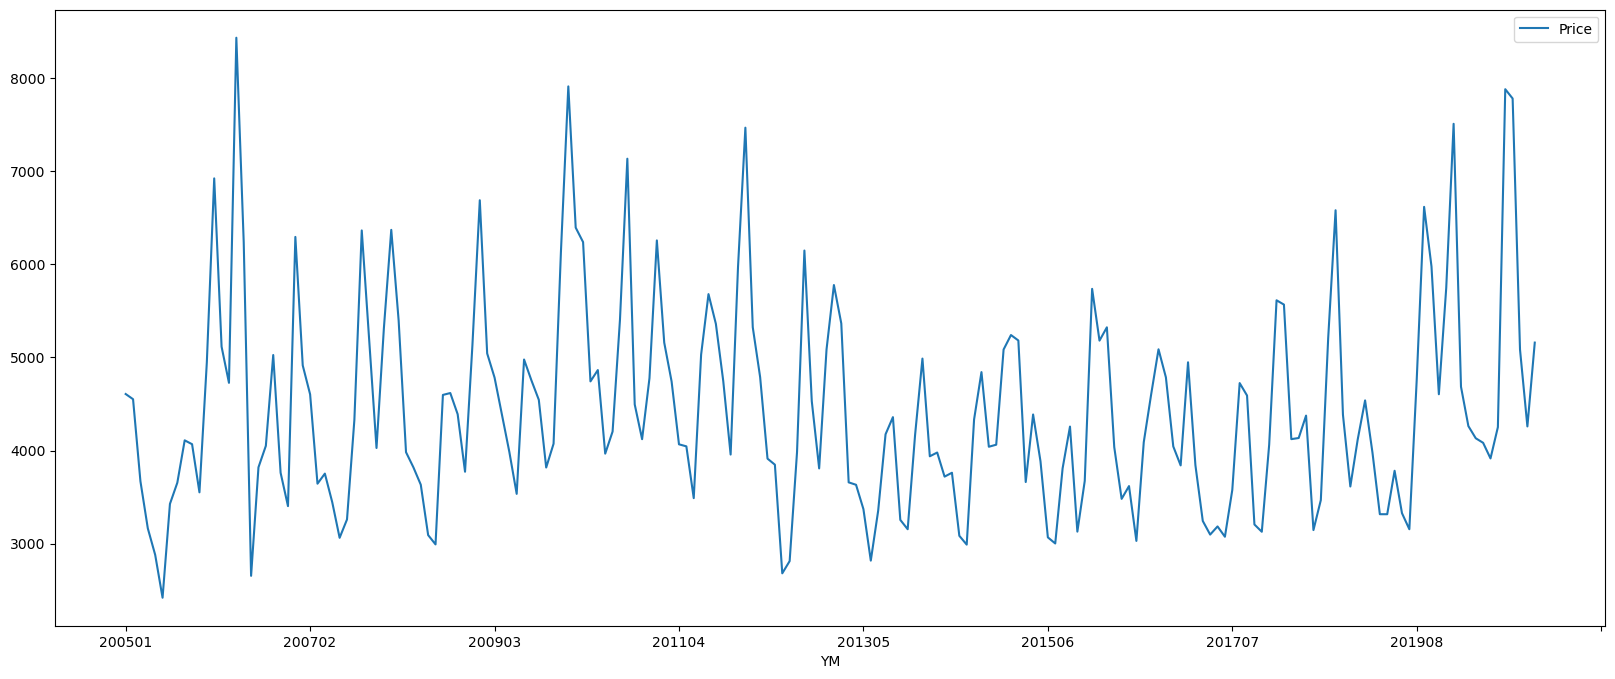

In [46]:
perilla.plot(figsize=(20,8))

In [47]:
perilla_train = perilla.iloc[:train_idx]
perilla_test = perilla.iloc[train_idx:]

C:\Users\Maplexz\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


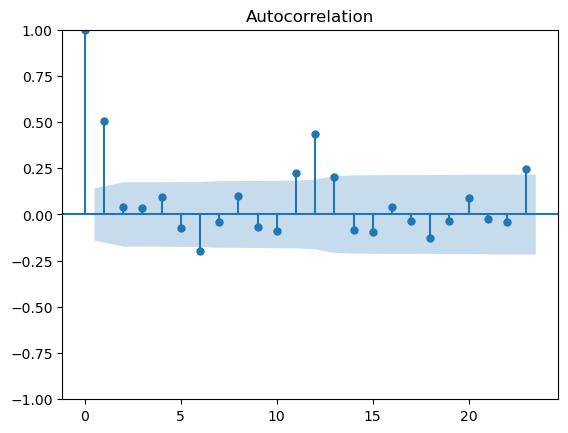

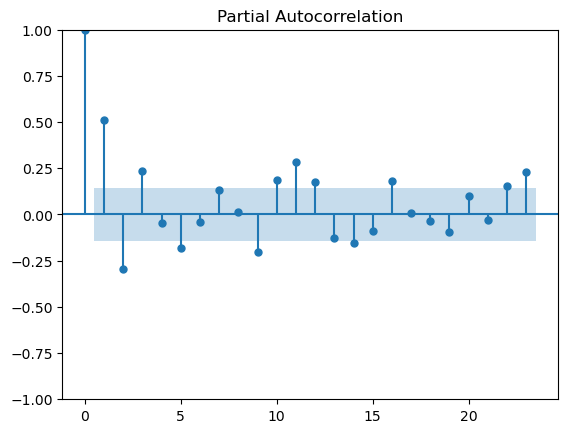

In [48]:
plot_acf(perilla)
plot_pacf(perilla)
plt.show()

C:\Users\Maplexz\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


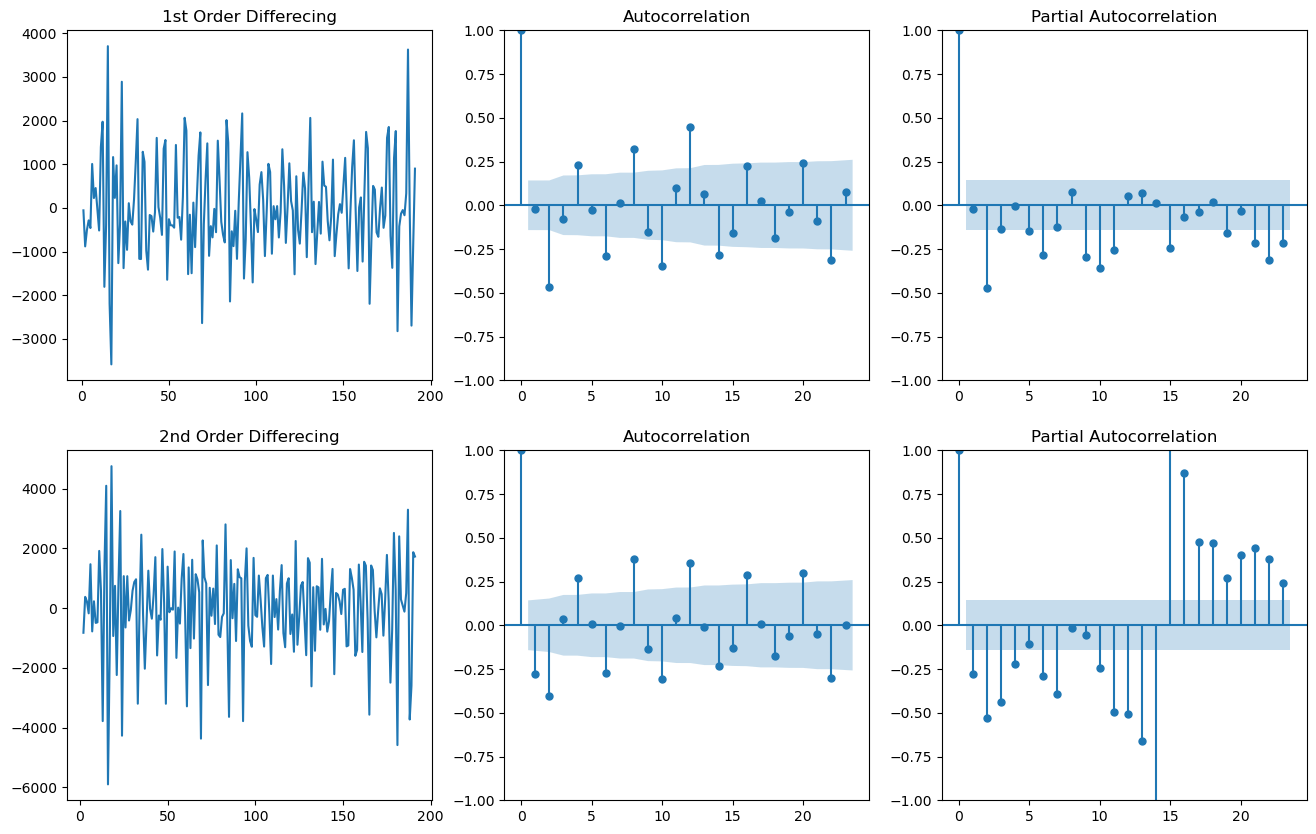

p-value:  0.3369023665283677
1st Order Diff p-value:  4.1139938418549404e-09
2nd Order Diff p-value:  5.6719193990864694e-11


In [49]:
perilla = perilla.reset_index()

f = plt.figure(figsize=(16,10))
ax1 = f.add_subplot(231)
ax1.set_title('1st Order Differecing')
ax1.plot(perilla.Price.diff())

ax2 = f.add_subplot(232)
plot_acf(perilla.Price.diff().dropna(), ax=ax2)

ax3 = f.add_subplot(233)
plot_pacf(perilla.Price.diff().dropna(), ax=ax3)

ax4 = f.add_subplot(234)
ax4.set_title('2nd Order Differecing')
ax4.plot(perilla.Price.diff().diff())

ax5 = f.add_subplot(235)
plot_acf(perilla.Price.diff().diff().dropna(), ax=ax5)

ax6 = f.add_subplot(236)
plot_pacf(perilla.Price.diff().diff().dropna(), ax=ax6)

plt.show()

perilla.index=perilla['YM']
perilla = perilla.drop('YM', axis=1)

result = adfuller(perilla.Price.dropna())
print('p-value: ', result[1])

result = adfuller(perilla.Price.diff().dropna())
print('1st Order Diff p-value: ', result[1])

result = adfuller(perilla.Price.diff().diff().dropna())
print('2nd Order Diff p-value: ', result[1])

In [50]:
model=ARIMA(perilla['Price'],order=(1,1,1))
history=model.fit()

C:\Users\Maplexz\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Maplexz\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Maplexz\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [51]:
history.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                  192
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1588.096
Date:                Tue, 03 Jan 2023   AIC                           3182.192
Time:                        15:09:59   BIC                           3191.948
Sample:                             0   HQIC                          3186.144
                                - 192                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5181      0.063      8.209      0.000       0.394       0.642
ma.L1         -1.0000      0.075    -13.313      0.000      -1.147      -0.853
sigma2      9.505e+05    7.9e-08    1.2e+13      0.000     9.5e+05     9.5e+05
===================================================================================
Ljung-Box (L1) (Q):                   4.06   Jarque-Bera (JB):                58.49
Prob(Q):                              0.04   Prob(JB):                         0.00
Heteroskedasticity (H):               0.80   Skew:                             1.07
Prob(H) (two-sided):                  0.39   Kurtosis:                         4.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.6e+27. Standard errors may be unstable.
"""

<AxesSubplot: xlabel='YM'>

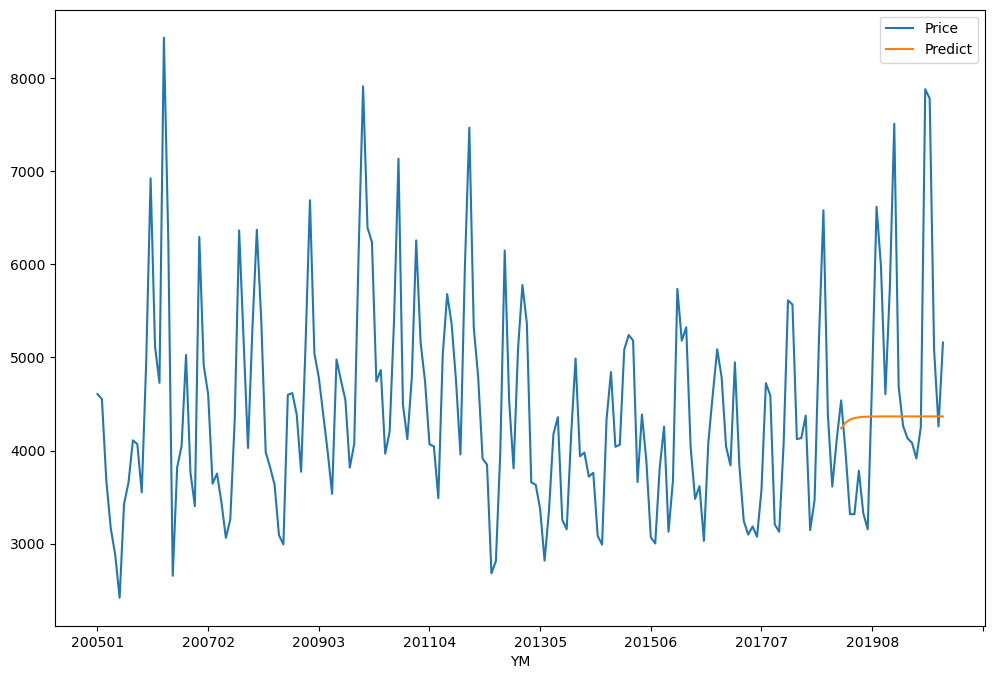

In [52]:
perilla['Predict']=history.predict(start=train_idx, end=train_idx+test_idx-1, dynamic=True)
perilla[['Price','Predict']].plot(figsize=(12,8))

In [53]:
y_true = perilla[~perilla['Predict'].isna()]['Price']
y_pred = perilla[~perilla['Predict'].isna()]['Predict']

mape = np.mean(np.abs(y_pred - y_true) / np.abs(y_true))
mae = np.mean(np.abs(y_pred - y_true))
mpe = np.mean((y_pred-y_true)/y_true)
rmse = np.mean((y_pred - y_true)**2)**.5


pprint.pprint({'mape':mape, 'mae':mae,
       'mpe':mpe, 'rmse':rmse})

{'mae': 1022.7069096206402,
 'mape': 0.1907251079932615,
 'mpe': -0.03559561500417829,
 'rmse': 1448.6310583925153}


# SARIMAX

In [54]:
model=sm.tsa.statespace.SARIMAX(perilla['Price'], exog=perilla_exog, order=(1, 1, 1), seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\Maplexz\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Maplexz\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Maplexz\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot: xlabel='YM'>

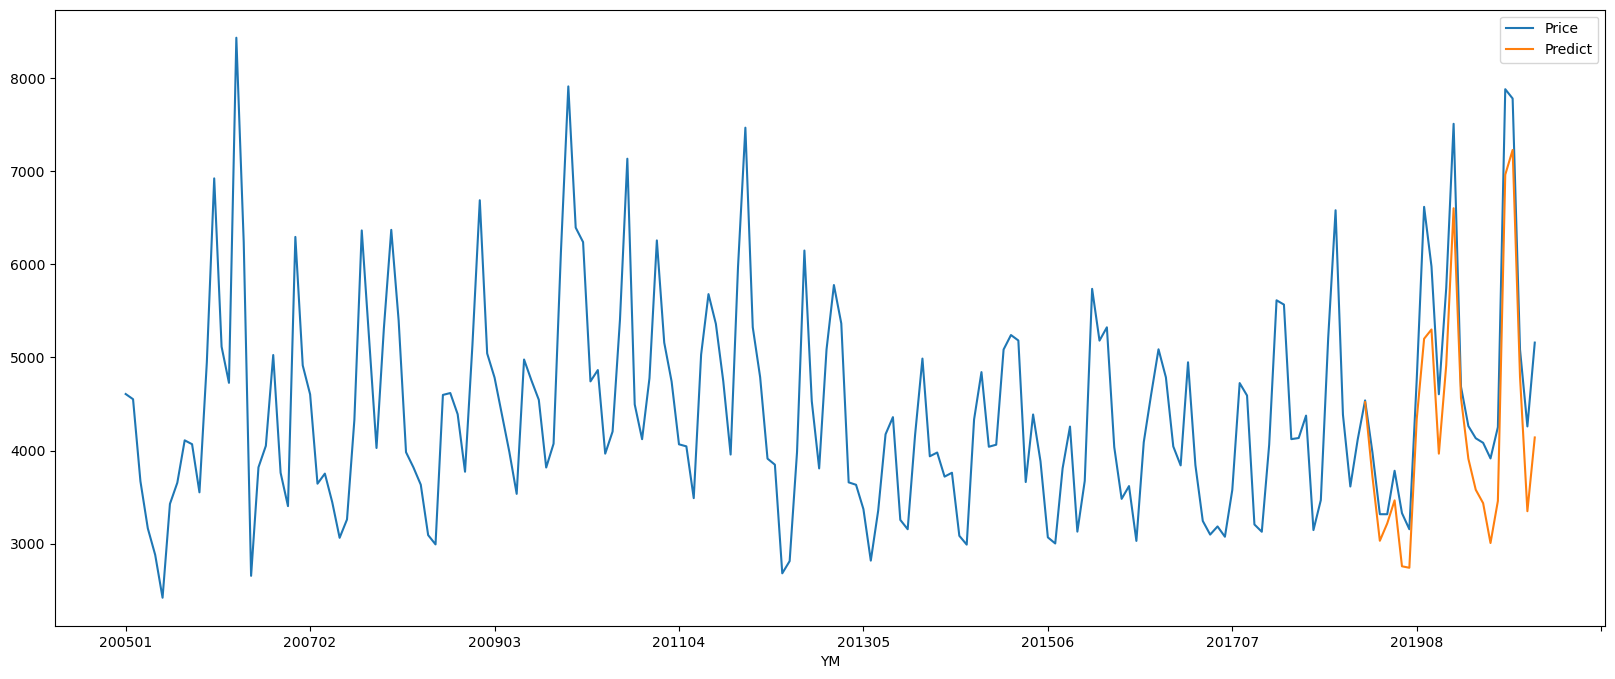

In [55]:
perilla['Predict']=results.predict(start=train_idx,end=train_idx+test_idx-1,dynamic=True)
perilla[['Price','Predict']].plot(figsize=(20,8))

In [56]:
y_true = perilla[~perilla['Predict'].isna()]['Price']
y_pred = perilla[~perilla['Predict'].isna()]['Predict']

mape = np.mean(np.abs(y_pred - y_true) / np.abs(y_true))
mae = np.mean(np.abs(y_pred - y_true))
mpe = np.mean((y_pred-y_true)/y_true)
rmse = np.mean((y_pred - y_true)**2)**.5


pprint.pprint({'mape':mape, 'mae':mae,
       'mpe':mpe, 'rmse':rmse})

{'mae': 579.6680380850199,
 'mape': 0.1193953706333512,
 'mpe': -0.1193953706333512,
 'rmse': 668.3614027104073}
